# World Happiness Report

# Let's start with importing necessary liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("happiness_score_dataset.csv") #reading the Data
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [4]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
data['Happiness Score'].value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

In [7]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# It seems that are no missing value in our data. Great let's see the distributio of data:

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

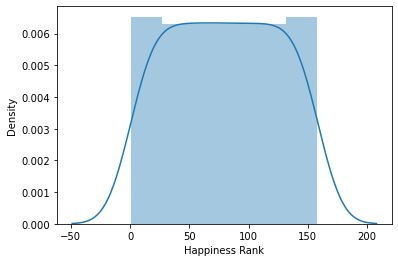

In [8]:
sns.distplot(data['Happiness Rank'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

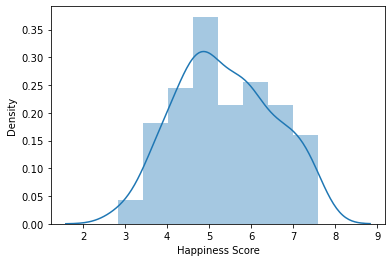

In [9]:
sns.distplot(data['Happiness Score'])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

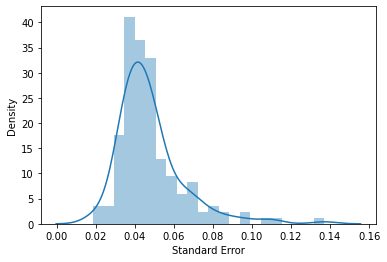

In [10]:
sns.distplot(data['Standard Error'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

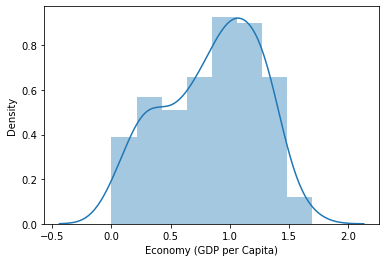

In [11]:
sns.distplot(data['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

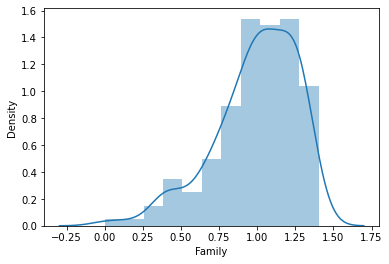

In [12]:
sns.distplot(data['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

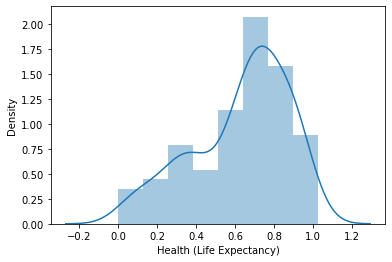

In [13]:
sns.distplot(data['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

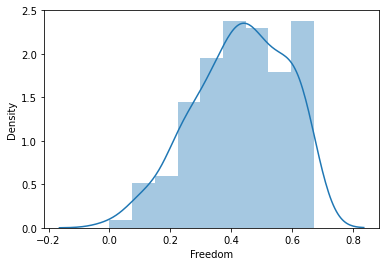

In [14]:
sns.distplot(data['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

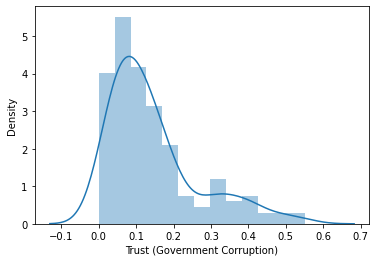

In [15]:
sns.distplot(data['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

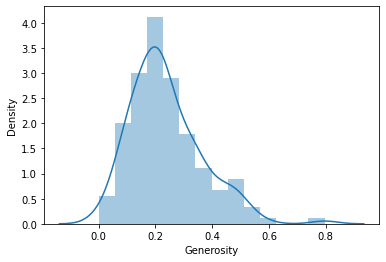

In [16]:
sns.distplot(data['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

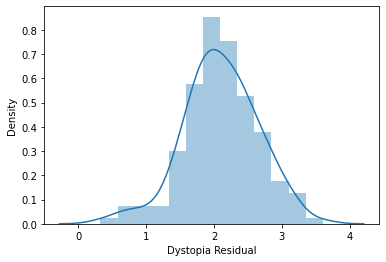

In [17]:
sns.distplot(data['Dystopia Residual'])

# we can see skewness in data for multiple columns will handle the skewness in further steps.

In [18]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# checking outliers

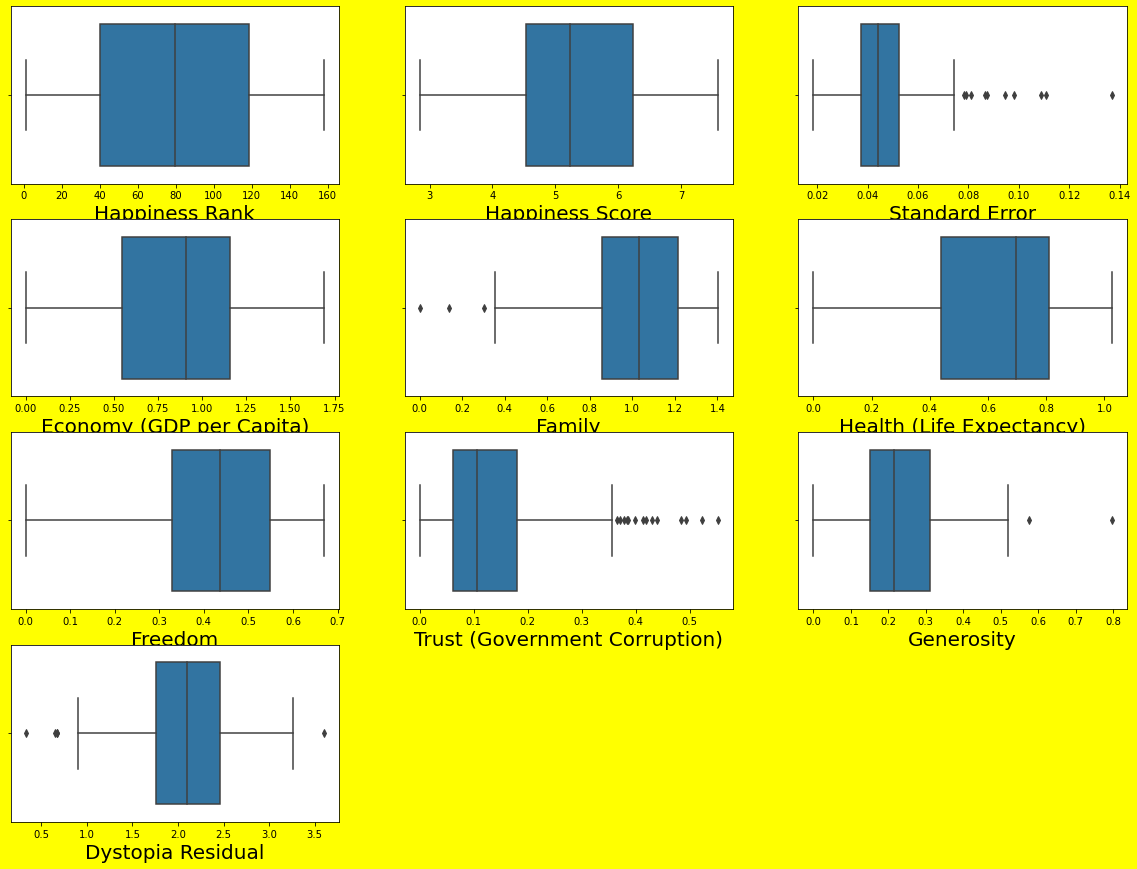

In [19]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in data[['Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family',
                    'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]:
    if plotnumber<=13:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [20]:
from scipy.stats import zscore
z_score=zscore(data[['Happiness Score','Standard Error','Economy (GDP per Capita)','Family',
                    'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']])
abs_z_score=np.abs(z_score)

In [21]:
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,77.617450,5.429611,0.046241,0.862163,1.008623,0.638624,0.427449,0.140405,0.231500,2.120862
std,44.854208,1.111256,0.014043,0.387975,0.251890,0.245937,0.150864,0.113385,0.119897,0.525654
min,1.000000,2.905000,0.018480,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,39.000000,4.610000,0.036800,0.593250,0.885880,0.467210,0.328180,0.061460,0.142720,1.792930
50%,78.000000,5.268000,0.043610,0.920490,1.035160,0.703800,0.434500,0.107130,0.213330,2.100170
75%,115.000000,6.295000,0.050690,1.159910,1.223930,0.814440,0.546040,0.175210,0.300300,2.465310
max,157.000000,7.587000,0.098110,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


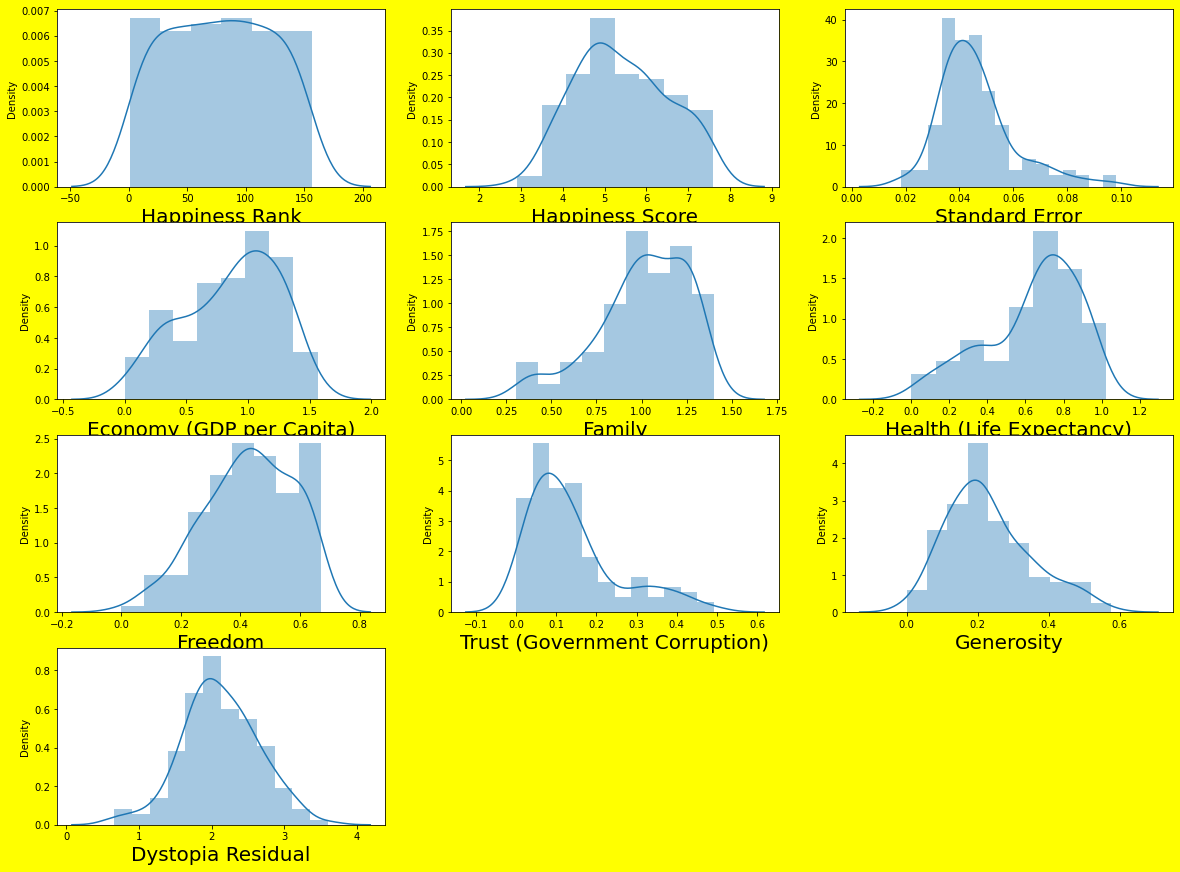

In [22]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in data[['Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family',
                    'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]:
    if plotnumber<=13:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# cannot make out much from the above plot lets bulid model

In [23]:
from sklearn.preprocessing import StandardScaler

# check multicollinearity problem find if one feature is dependent on another feature

In [24]:
from sklearn.preprocessing import LabelEncoder
Lab_enc=LabelEncoder()

In [25]:
df2=Lab_enc.fit_transform(data['Country'])
pd.Series(df2)

0      129
1       57
2       36
3      101
4       24
      ... 
144     65
145     20
146      0
147     13
148     21
Length: 149, dtype: int32

In [26]:
data['Country']=df2
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,129,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,57,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,36,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,101,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,65,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [27]:
df3=Lab_enc.fit_transform(data['Region'])
pd.Series(df3)

0      9
1      9
2      9
3      9
4      5
      ..
144    8
145    8
146    7
147    8
148    8
Length: 149, dtype: int32

In [28]:
data['Region']=df3
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,129,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,57,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,36,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,101,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,65,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [29]:
x=data.drop(columns=['Happiness Score'],axis=1)
y=data['Happiness Score']

In [30]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [31]:
x_scaled.shape

(149, 11)

# * check multicollinearity problem

# this is how our data looks now after scaling great now we will check for multicollinearity using VIF(variance inflation factor)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]

vif['feature']=x.columns

In [34]:
vif

,vif,feature
0,1.067348,Country
1,1.482750,Region
2,86.814181,Happiness Rank
3,1.216933,Standard Error
4,14.165329,Economy (GDP per Capita)
5,6.488064,Family
6,9.075735,Health (Life Expectancy)
7,3.644836,Freedom
8,1.996186,Trust (Government Corruption)
9,2.254527,Generosity


# dropping columns

In [35]:
data=data.drop(columns=['Happiness Rank','Economy (GDP per Capita)','Health (Life Expectancy)','Dystopia Residual'])
data

,Country,Region,Happiness Score,Standard Error,Family,Freedom,Trust (Government Corruption),Generosity
0,129,9,7.587,0.03411,1.34951,0.66557,0.41978,0.29678
1,57,9,7.561,0.04884,1.40223,0.62877,0.14145,0.43630
2,36,9,7.527,0.03328,1.36058,0.64938,0.48357,0.34139
3,101,9,7.522,0.03880,1.33095,0.66973,0.36503,0.34699
4,24,5,7.427,0.03553,1.32261,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...
150,65,8,3.655,0.05141,0.77115,0.46866,0.17922,0.20165
151,20,8,3.587,0.04324,0.85188,0.39493,0.12832,0.21747
152,0,7,3.575,0.03084,0.30285,0.23414,0.09719,0.36510
154,13,8,3.340,0.03656,0.35386,0.48450,0.08010,0.18260


# * split into train data set

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [38]:
import xgboost as xgb

In [39]:
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [40]:
xgb.score(x_train,y_train)

0.9999995335601325

In [41]:
xgb.score(x_test,y_test)

0.9922783482606954

In [56]:
from sklearn.metrics import r2_score

# * Adaboost

In [57]:
from sklearn.ensemble import AdaBoostRegressor

In [58]:
ada=AdaBoostRegressor()

In [59]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [60]:
y_pred = ada.predict(x_train)

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [67]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [68]:
accuracy=metrics.r2_score(y_train,y_pred)
print('R Square score',accuracy)

R Square score 0.9974067795348674


In [70]:
from sklearn.metrics import r2_score

In [71]:
y_test_pred=ada.predict(x_test)

# model Evaluation

In [72]:
accuracy=metrics,r2_score(y_test,y_test_pred)
print('R aquare score:',accuracy)

R aquare score: (<module 'sklearn.metrics' from 'C:\\Users\\yjjai\\anaconda3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>, 0.9950775368743646)


# Hyperparameter Tuning using Randomizedsearchcv

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
params={'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]}
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [75]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [76]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=70)

In [77]:
ada=AdaBoostRegressor(learning_rate=0.4,n_estimators=70)

In [78]:
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.4, n_estimators=70)

In [79]:
y_pred=ada.predict(x_test)

In [80]:
print('xxx accuracy post tuning xxx')
print(metrics.r2_score(y_test,y_pred))

xxx accuracy post tuning xxx
0.9940670867967698


# let's plot and visualize

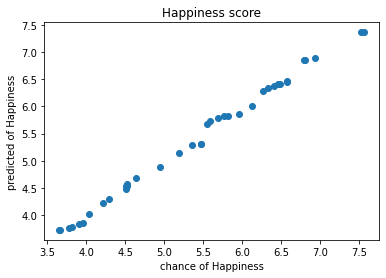

In [83]:
plt.scatter(y_test,y_pred)
plt.xlabel("chance of Happiness")
plt.ylabel("predicted of Happiness")
plt.title("Happiness score")
plt.show()

In [84]:
# batch  No - ds0522
# Data Trained